In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
sn.set()
import matplotlib.font_manager as fm
fl = fm.FontProperties(fname ="C:\Windows\Fonts\malgun.ttf").get_name()
plt.rc('font',family=fl)

In [2]:
from statsmodels.iolib.summary2 import summary_col
import statsmodels.stats.stattools as tools
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.compat import lzip
import statsmodels.stats as sm_stats
import statsmodels.stats.outliers_influence as oi
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.stats.outliers_influence as oi
import statsmodels.stats as sm_stats

In [3]:
df = pd.read_csv('wage.csv',index_col=0 , dtype =float)
df.head()

,wage,female,nonwhite,union,education,exper,age,wind,femalenonw,lnwage
obs,,,,,,,,,,
1.0,11.55,1.0,0.0,0.0,12.0,20.0,38.0,1.0,0.0,2.446686
2.0,5.00,0.0,0.0,0.0,9.0,9.0,24.0,0.0,0.0,1.609438
3.0,12.00,0.0,0.0,0.0,16.0,15.0,37.0,1.0,0.0,2.484907
4.0,7.00,0.0,1.0,1.0,14.0,38.0,58.0,0.0,0.0,1.945910
5.0,21.15,1.0,1.0,0.0,16.0,19.0,41.0,1.0,1.0,3.051640


In [4]:
df.columns

Index(['wage', 'female', 'nonwhite', 'union', 'education', 'exper', 'age',
       'wind', 'femalenonw', 'lnwage'],
      dtype='object')

In [5]:
df.describe(include = 'all').round(2)
df.corr()

,wage,female,nonwhite,union,education,exper,age,wind,femalenonw,lnwage
count,1289.00,1289.0,1289.00,1289.00,1289.00,1289.00,1289.00,1289.00,1289.00,1289.00
mean,12.37,0.5,0.15,0.16,13.15,18.79,37.93,0.41,0.08,2.34
std,7.90,0.5,0.36,0.37,2.81,11.66,11.49,0.49,0.28,0.59
min,0.84,0.0,0.00,0.00,0.00,0.00,18.00,0.00,0.00,-0.17
25%,6.92,0.0,0.00,0.00,12.00,9.00,29.00,0.00,0.00,1.93
50%,10.08,0.0,0.00,0.00,12.00,18.00,37.00,0.00,0.00,2.31
75%,15.63,1.0,0.00,0.00,16.00,27.00,47.00,1.00,0.00,2.75
max,64.08,1.0,1.00,1.00,20.00,56.00,65.00,1.00,1.00,4.16


,wage,female,nonwhite,union,education,exper,age,wind,femalenonw,lnwage
wage,1.000000,-0.223302,-0.127834,0.102247,0.456518,0.173173,0.287469,0.389039,-0.131232,0.923274
female,-0.223302,1.000000,0.043272,-0.088857,-0.031439,-0.022657,-0.030685,-0.072869,0.304050,-0.246895
nonwhite,-0.127834,0.043272,1.000000,0.080588,-0.087062,-0.039129,-0.061016,-0.080025,0.711976,-0.133770
union,0.102247,-0.088857,0.080588,1.000000,0.003967,0.154319,0.157553,-0.058265,0.013964,0.165784
education,0.456518,-0.031439,-0.087062,0.003967,1.000000,-0.180103,0.062058,0.370409,-0.073335,0.447815
exper,0.173173,-0.022657,-0.039129,0.154319,-0.180103,1.000000,0.970575,0.084293,-0.008717,0.192861
age,0.287469,-0.030685,-0.061016,0.157553,0.062058,0.970575,1.000000,0.176206,-0.026797,0.305315
wind,0.389039,-0.072869,-0.080025,-0.058265,0.370409,0.084293,0.176206,1.000000,-0.079714,0.372983
femalenonw,-0.131232,0.304050,0.711976,0.013964,-0.073335,-0.008717,-0.026797,-0.079714,1.000000,-0.138166
lnwage,0.923274,-0.246895,-0.133770,0.165784,0.447815,0.192861,0.305315,0.372983,-0.138166,1.000000


# 히트맵
- 히트맵으로 시각화를 해보니 색이 밝을수록 높은 상관관계를 지닌다.
- wage와 lnwqge는 제외하고 (age와 exper), (nonwhite와 femalenonw)는 높은 상관관계를 지니므로 다중공선성의 문제를 위해서라도 둘중 하나는 변수를 뺴주는게 좋다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


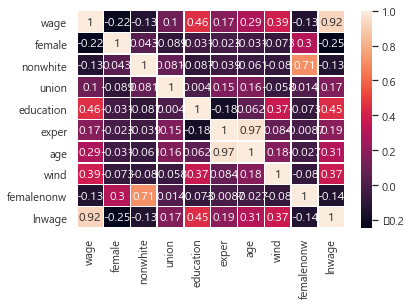

In [6]:
sn.heatmap(data = df.corr(), annot=True, linewidths = 0.5)
plt.show()

In [29]:
reg0= smf.ols('wage ~ female + nonwhite + union + education + exper + age + wind + femalenonw',
              missing = 'drop', data = df).fit()
print(reg0.summary())
# 현재 다중공선선이 존재한다는 에러메세지가 있다.

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          3.81e-119
Time:                        14:10:54   Log-Likelihood:                -4205.2
No. Observations:                1289   AIC:                             8426.
Df Residuals:                    1281   BIC:                             8468.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5942      0.089     -6.647      0.0

### VIF

In [8]:
features = 'female + nonwhite + union + education + exper + age + wind + femalenonw'
y, X = dmatrices( 'wage~'+features, df, return_type = 'dataframe')

In [9]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['features'] = X.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,Intercept
1,1.193230,female
2,2.207676,nonwhite
3,1.053351,union
4,inf,education
5,inf,exper
6,inf,age
7,1.209359,wind
8,2.397595,femalenonw


In [10]:
# 교육, 경력, 나이는 다중공선성에 있어서 완전하게 무관하다.
print(vif.round(1))

   VIF Factor    features
0         0.0   Intercept
1         1.2      female
2         2.2    nonwhite
3         1.1       union
4         inf   education
5         inf       exper
6         inf         age
7         1.2        wind
8         2.4  femalenonw


### 다중공선성이 있고 (age와 exper), (nonwhite와 femalenonw)중 한개씩 제거를 해주어야 한다.
### VIF가 좀더 높은 femalenonw와 age를 임의로 제거한다.

# 변수를 제거하였더니 R-squared은 약간 떨어졌지만 F-statistic는 증가하였다. 
# 또한 다중공선성의 에러메세지가 제거 되었다.

In [30]:
reg1 = smf.ols('wage ~ female + nonwhite + union + education + exper + wind ',
              missing = 'drop', data = df).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     119.4
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          7.04e-120
Time:                        14:11:01   Log-Likelihood:                -4206.0
No. Observations:                1289   AIC:                             8426.
Df Residuals:                    1282   BIC:                             8462.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2667      1.016     -5.186      0.0

## 정규성 확인

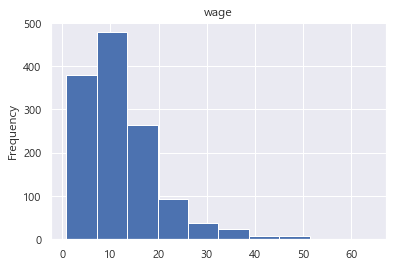

In [12]:
df['wage'].plot(kind = 'hist',title='wage')

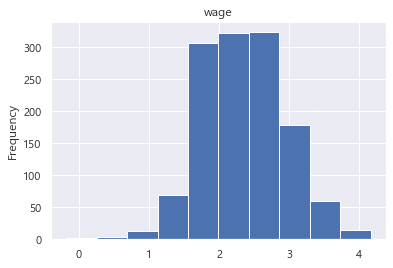

In [13]:
# wage에 로그를 취하는게 더 나아보임
df['lnwage'].plot(kind = 'hist',title='wage')

((array([-3.27007457, -3.01030999, -2.86569395, ...,  2.86569395,
          3.01030999,  3.27007457]),
  array([-20.58590066, -16.75066899, -16.06514674, ...,  38.87540125,
          41.56531553,  48.92719155])),
 (5.980498816387634, -4.4629757110189626e-14, 0.9438607240635343))

Text(0.5, 1.0, 'Residual Q-Q Plot')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


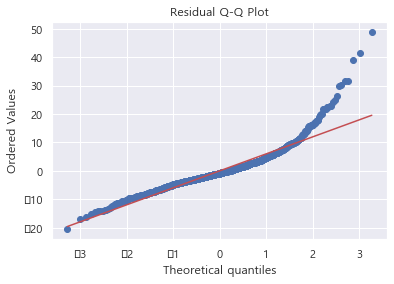

In [14]:
from scipy import stats
stats.probplot(reg1.resid, dist = 'norm', plot = plt)
plt.title('Residual Q-Q Plot')

In [15]:
name = ['Jarque-Beta','Chi^2 two-tail prob','Skew','Kurtosis']
jarque=sms.jarque_bera(reg1.resid)
lzip(name,jarque)

[('Jarque-Beta', 3841.6176571559085),
 ('Chi^2 two-tail prob', 0.0),
 ('Skew', 1.7213232510254337),
 ('Kurtosis', 10.724997674700578)]

In [16]:
reg2 = smf.ols('lnwage ~ female + nonwhite + union + education + exper + wind',
              missing = 'drop', data = df).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          1.44e-127
Time:                        13:54:02   Log-Likelihood:                -836.40
No. Observations:                1289   AIC:                             1687.
Df Residuals:                    1282   BIC:                             1723.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0379      0.074     13.956      0.0

((array([-3.27007457, -3.01030999, -2.86569395, ...,  2.86569395,
          3.01030999,  3.27007457]),
  array([-2.61483592, -2.43672503, -2.20990121, ...,  1.65003677,
          1.68641382,  1.86722426])),
 (0.4574684322959091, -3.7859141951318e-16, 0.985889060521301))

Text(0.5, 1.0, 'Residual Q-Q Plot')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


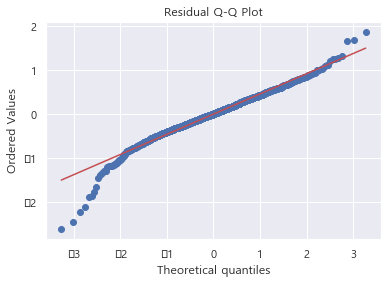

In [17]:
from scipy import stats
stats.probplot(reg2.resid, dist = 'norm', plot = plt)
plt.title('Residual Q-Q Plot')

In [18]:
name = ['Jarque-Beta','Chi^2 two-tail prob','Skew','Kurtosis']
jarque=sms.jarque_bera(reg2.resid)
lzip(name,jarque)

[('Jarque-Beta', 431.2544565204378),
 ('Chi^2 two-tail prob', 2.2609169955232883e-94),
 ('Skew', -0.5347193148724797),
 ('Kurtosis', 5.6240930263164755)]

## 이분산성

## 현재 P-value가 매우 높다.

In [19]:
# Breuch-Pagan test
name = ['Lagrange multiplier static','p-value','f-value','f p-value']
BPtest = sms.het_breuschpagan(reg2.resid, reg2.model.exog)
lzip(name,BPtest)

[('Lagrange multiplier static', 33.889020169491),
 ('p-value', 7.067610635604043e-06),
 ('f-value', 5.769174274288003),
 ('f p-value', 6.129911744859487e-06)]

## P-value가 매우 감소하였다.

In [20]:
# White general test
name = ['Lagrange multiplier static','p-value','f-value','f p-value']
Whitetest=sms.het_white(reg2.resid, reg2.model.exog)
lzip(name, Whitetest)

[('Lagrange multiplier static', 55.88100087539084),
 ('p-value', 0.00014706234976639043),
 ('f-value', 2.4924237241728813),
 ('f p-value', 0.00011939320136432909)]

# 화이트 강건 표준오차를 적용하였더니 표준오차는 약간씩 증가 하였지만 P 값이 감소 하였다. 또한 Dubin-Watson도 1.977로 안정적인 수치이므로 자기상관이 없다고 할 수 있다.

In [31]:
reg3 = smf.ols('lnwage ~ female + nonwhite + union + education + exper + wind',
              missing = 'drop', data = df).fit(cov_type = 'HC1')
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          1.06e-141
Time:                        14:11:14   Log-Likelihood:                -836.40
No. Observations:                1289   AIC:                             1687.
Df Residuals:                    1282   BIC:                             1723.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0379      0.075     13.827      0.0

# Breusch-Godfrey test

## reg0은 아무셋팅도 하지않은 초기 모델인데 초기에도 p-value가 높아 귀무가설을 reject하지는 않음. 즉 자기상관은 원래부터 없었음 그래도 Breusch-Godfrey test를 해주니 p-value가 더 커지기는 하였음

In [22]:
name = ['LM-stat','LM:p-value','F-value','F:p-value']
bg_t = sm_diagnostic.acorr_breusch_godfrey(reg0,nlags = 2)
print(pd.DataFrame(lzip(name, bg_t)))

            0         1
0     LM-stat  2.252239
1  LM:p-value  0.324289
2     F-value  1.119339
3   F:p-value  0.326815


In [23]:
name = ['LM-stat','LM:p-value','F-value','F:p-value']
bg_t = sm_diagnostic.acorr_breusch_godfrey(reg3,nlags = 2)
print(pd.DataFrame(lzip(name, bg_t)))

            0         1
0     LM-stat  1.102142
1  LM:p-value  0.576332
2     F-value  0.547692
3   F:p-value  0.578419


# FGLS
- 자기상관이 없긴하지만 FGLS를 해주니 Durbin-Watson은 증가하지만 P도 증가해버림 굳이 올릴 필요는 없어보임

In [25]:
reg1_model = smf.ols('lnwage ~ female + nonwhite + union + education + exper + wind', missing='drop',data =df)
reg1_CORC = sm.GLSAR(reg1_model.endog, reg1_model.exog)
reg1_CORC_fit = reg1_CORC.iterative_fit(maxiter =100)
print(reg1_CORC_fit.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.376
Model:                          GLSAR   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     128.4
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          2.82e-127
Time:                        14:07:13   Log-Likelihood:                -836.09
No. Observations:                1288   AIC:                             1686.
Df Residuals:                    1281   BIC:                             1722.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0389      0.074     13.952      0.0

# 처음에는 모형설정의 오류가 있었지만 로그도 취해주고 불필요한 값도 제거해주니 p-value가 증가하여 모형설정의 오류가 줄어듦

In [36]:
import statsmodels.stats.outliers_influence as oi
print('초기모델 : ',oi.reset_ramsey(reg0, degree=2))
print('보정모델 : ',oi.reset_ramsey(reg3, degree=2))

초기모델 :  <F test: F=array([[30.64096862]]), p=3.762499222441025e-08, df_denom=1.28e+03, df_num=1>
보정모델 :  <F test: F=array([[0.23400247]]), p=0.62865448465127, df_denom=1.28e+03, df_num=1>


# 결론
## 다중공선성
- 초기 모델인 reg0에서 다중공선성의 오류메세지가 출력되었음
- VIF와 히트맵을 통해 시각화를 해보니 변수 2개를 제거해주는게 바람직해 보임
- age는 exper로 대체 가능하며 femalenonw는 애초에 의미없는 변수로 삭제
- 다중공선성의 오류메세지가 사라짐

## 정규성
- y값이 wage가 정규성을 띄지않음
- wage에 log를 취해주어 정규성을 띄게 하였음

## 동분산
- 표본의 개수가 250개 이상이므로 화이트강건표준오차 'HC1'모델을 이용
- 적용모델인 reg3모델에서 표준오차는 약간씩 상승하였지만 P값이 모두 0이 되면서 매우 수치가 좋아짐

## 자기상관
- 초기 모델을 불러올 떄부터 Durbin-Watson은 1.9로 변수간 자기상관은 없었고 그 이후 여러 보정을 해주어도 크게 달라지지 않음
- Breusch-Godfrey test로도 검증을 해보았지만 처음부터 자기상관은 없다는 결론이 나옴
- FGLS 보정을 해주었는데 Durbin-Watson은 2에 더 가까워졌지만 P값이 상승해서 보정을 굳이 해주지 않아도 무방해보임

## 모형설정의 오류
- 테스트결과 초기 모델 reg0에서는 p값이 매우 낮게 나와 모형설정의 오류가 존재하였음
- 여러 보정결과 p값이 상승하였고 귀무가설을 reject할 확률도 상승

#
- 초기에 데이터 reg0은 Durbin-Watson의 문제는 없었음 즉 자기상관은 존재하지않음
- 하지만 다중공선성의 오류메세지가 떠서 변수간 상관관계를 히트맵을 통하여 시각화 함
- 2개의 불필요 변수 age와 femalenonw을 제거함 (경력이 곧 나이를 대체할 수 있고 femalenow는 애초에 P값이 너무 높음)
- 다중공선성의 에러메세지가 사라짐
- y값에 해당하는 wage가 정규성을 띄지 않아 log를 취해주어서 정규성을 띄게 됨
- 화이트 강건 표준오차를 적용해보니 값이 매우 잘 나왔음. 표준오차는 약간씩 증가 하였지만 모든P값은 0이되었음 (샘플이 250개 이상이라서 'HC1'모델을 사용)
- Breusch-Godfrey test결과 자기상관은 처음부터 없었지만 FGLS모델을 이용해서 보정을 해봄
- 보정을 하니 Durbin-Watson은 2에 더 가까워졌지만 오히려 P값은 더 증가함 굳이 보정을 하지 않아도 돼보임
- 모형설정의 오류는 초기에 P값이 매우 작았지만 여러 보정을 해주면서 P값이 증가하면서 모형설정의 오류가 줆어들었음